In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
matplotlib.style.use('seaborn-whitegrid')

# PMT Implemetation in RAT

Apparently, default PMT properties are defined across a set of files under the `data` directory.

As an example, the R11780 12'' high QE tubes are defined as follows:

```javascript
// == PMT.ratdb ==
{
name: "PMT",
index: "r11780_hqe",
valid_begin: [0,0],
valid_end: [0,0],

dynode_material: "stainless_steel",
glass_material: "glass",
pmt_vacuum_material: "pmt_vacuum",
photocathode_surface: "photocathode_R11780",
mirror_surface: "mirror",
dynode_surface: "stainless_steel",

dynode_radius: 41.5, // mm
dynode_top: -46.0, // mm
wall_thickness: 3.0, // mm

z_edge:   [112.50, 79.59, 0.75, 0.00, -79.59, -119.79, -127.50, -285.0],
rho_edge: [0.00, 108.87, 151.35, 151.50, 108.87, 66.48, 63.0, 63.0],
z_origin: [-84.00, 0.00, 0.00, 0.00, 84.00, -127.5, -285.0],
}
```
---

```javascript
// == OPTICS.ratdb ==
{
name: "OPTICS",
index: "photocathode_R11780",
valid_begin : [0, 0],
valid_end : [0, 0],
photocathode: 1,

EFFICIENCY_option: "wavelength",
EFFICIENCY_value1: [60.0, 200.0, 260.0, 270.0, 280.0, 285.0, 290.0, 300.0, 310.0, 330.0, 370.0, 420.0, 475.0, 500.0, 530.0, 570.0, 600.0, 630.0, 670.0, 700.0, 800.0, ],
EFFICIENCY_value2: [0.0, 0.0, 0.0, 0.0078, 0.039, 0.078, 0.117, 0.1404, 0.156, 0.23, 0.3200, 0.295, 0.206, 0.1656, 0.1150, 0.047, 0.0195, 0.0078, 0.00078, 0.0, 0.0],

RINDEX_option: "wavelength",
RINDEX_value1: [60.0, 200.0, 380.0, 395.0, 410.0, 425.0, 440.0, 455.0, 470.0, 485.0, 500.0, 515.0, 530.0, 545.0, 560.0, 575.0, 590.0, 605.0, 620.0, 635.0, 650.0, 665.0, 680.0, 800.0, ],
RINDEX_value2: [1.0, 1.0, 1.92, 2.18, 2.38, 2.61, 2.70, 2.87, 3.00, 3.00, 3.00, 3.09, 3.26, 3.20, 3.12, 3.06, 3.01, 2.98, 2.96, 2.95, 2.95, 2.95, 2.96, 3.0, ],

KINDEX_option: "wavelength",
KINDEX_value1: [60.0, 200.0, 380.0, 395.0, 410.0, 425.0, 440.0, 455.0, 470.0, 485.0, 500.0, 515.0, 530.0, 545.0, 560.0, 575.0, 590.0, 605.0, 620.0, 635.0, 650.0, 665.0, 680.0, 800.0, ],
KINDEX_value2: [3.0, 3.0, 1.69, 1.69, 1.71, 1.53, 1.50, 1.44, 1.34, 1.11, 1.06, 1.05, 0.86, 0.63, 0.53, 0.46, 0.42, 0.38, 0.37, 0.35, 0.34, 0.34, 0.33, 0.1, ],

THICKNESS_value1: [188.0, 0.0, ],
THICKNESS_value2: [26e-6, 26e-6, ],
PROPERTY_LIST: ["EFFICIENCY", "RINDEX", "KINDEX", "THICKNESS", ]
}
```
---

```javascript
// == PMTCHARGE.ratdb ==
{
//default to r11780_hqe charge distribution
name: "PMTCHARGE",
index: "r11780_hqe",
valid_begin: [0,0],
valid_end: [0,0],

//units of pC here, implementers can choose their own units
charge: [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3., 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4., 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.],

//this will be integrated and normalized
//values based on a single gaussian fit to measured charge distribution of a single R11780-HQE PMT
charge_prob: [0.603378, 0.849476, 1.16968, 1.57519, 2.0747, 2.67257, 3.3671, 4.14893, 5., 5.89327, 6.79355, 7.65931, 8.4457, 9.10825, 9.60699, 9.91044, 9.99889, 9.86651, 9.52201, 8.98767, 8.29695, 7.49105, 6.61486, 5.71283, 4.82542, 3.98632, 3.22079, 2.54511, 1.96699, 1.4868, 1.09914, 0.794714, 0.561979, 0.388671, 0.262904, 0.173927, 0.112535, 0.0712136, 0.0440748, 0.0266791, 0.0157945, 0.00914521, 0.00517886, 0.00286832, 0.00155373, 0.000823142, 0.000426509, 0.00021614, 0.000107126, 0.0000519286, 0.0000246191],
}
```

---

```javascript
// == PMTTRANSIT.ratdb == 
{
// Default is for zero cable delay, zero transit time
// Placeholder for r11780_hqe data
name: "PMTTRANSIT",
index: "r11780_hqe", 
valid_begin : [0, 0],
valid_end : [0, 0],
cable_delay: 0.0,

//need two points
time: [ -0.001, 0.000, 0.001 ],
//this will be integrated and normalized
time_prob: [ 0.0, 1.0, 0.0 ]
}
```

## R7723 Implemetation

We use the [R7723](https://www.hamamatsu.com/resources/pdf/etd/R7723_R7724_R7725_TPMH1315E.pdf) 2'' PMTs from Hamamatsu

Although it's probably a good idea to add R7723 into the default database files so that others can use in the future, for the sake of portable implementation I will add all new files (with the same name) under the `data/BNL1ton/` directory

### PMT Geometry

```javascript
// -- PMT.ratdb --
{
name: "PMT",
index: "r7723",
valid_begin: [0,0],
valid_end: [0,0],

dynode_material: "stainless_steel",
glass_material: "glass",
pmt_vacuum_material: "pmt_vacuum", // dilute air
photocathode_surface: "photocathode_r7723",
mirror_surface: "mirror",
dynode_surface: "stainless_steel",

dynode_radius: 20.0, // mm guess
dynode_top:   -30.0, // mm guess
wall_thickness: 3.0, // mm guess

z_edge:   [4.00, 1.00, 0.00, -16.75, -30.00, -32.00, -108.00], // total length is 112 mm, must have equator 0.0
rho_edge: [26.00, 26.00, 26.00,  26.00, 26.00, 26.00, 26.00],  // glass 52 mm, cathod 46 mm
z_origin: [-10000.00, 0.00, 0.00,  10000.00, 31.00, 0.00],  // must be len(z_edge) - 1
}
```


### PMT Optics

```javascript
// -- OPTICS.ratdb
{
name: "OPTICS",
index: "photocathode_r7723",
valid_begin : [0, 0],
valid_end : [0, 0],
photocathode: 1,

EFFICIENCY_option: "wavelength",
EFFICIENCY_value1: [
  60.00,  260.00,  262.10,  266.00,  269.90,  273.70,  276.80,  279.90,
  283.80,  290.80,  297.70,  307.70,  323.90,  343.20,  363.90,  386.20,
  406.20,  426.20,  448.50,  464.70,  482.30,  502.30,  519.20,  530.80,
  540.00,  550.70,  560.70,  572.20,  586.00,  595.20,  605.20,  613.60,
  620.50,  628.20,  635.90,  641.20,  655.80,  674.10,  684.00,  698.60,
  700.00,  800.00],
EFFICIENCY_value2: [
  0.00,  0.00,  0.02,  0.03,  0.03,  0.04,  0.06,  0.07,  0.09,  0.12,
  0.15,  0.18,  0.22,  0.24,  0.25,  0.25,  0.25,  0.24,  0.22,  0.20,
  0.18,  0.15,  0.13,  0.11,  0.09,  0.07,  0.06,  0.05,  0.04,  0.03,
  0.02,  0.02,  0.02,  0.01,  0.01,  0.01,  0.00,  0.00,  0.00,  0.00,
  0.00,  0.00],

RINDEX_option: "wavelength",
RINDEX_value1: [60.0, 200.0, 380.0, 395.0, 410.0, 425.0, 440.0, 455.0, 470.0, 485.0, 500.0, 515.0, 530.0, 545.0, 560.0, 575.0, 590.0, 605.0, 620.0, 635.0, 650.0, 665.0, 680.0, 800.0, ],
RINDEX_value2: [1.0, 1.0, 1.92, 2.18, 2.38, 2.61, 2.70, 2.87, 3.00, 3.00, 3.00, 3.09, 3.26, 3.20, 3.12, 3.06, 3.01, 2.98, 2.96, 2.95, 2.95, 2.95, 2.96, 3.0, ],

KINDEX_option: "wavelength",
KINDEX_value1: [60.0, 200.0, 380.0, 395.0, 410.0, 425.0, 440.0, 455.0, 470.0, 485.0, 500.0, 515.0, 530.0, 545.0, 560.0, 575.0, 590.0, 605.0, 620.0, 635.0, 650.0, 665.0, 680.0, 800.0, ],
KINDEX_value2: [3.0, 3.0, 1.69, 1.69, 1.71, 1.53, 1.50, 1.44, 1.34, 1.11, 1.06, 1.05, 0.86, 0.63, 0.53, 0.46, 0.42, 0.38, 0.37, 0.35, 0.34, 0.34, 0.33, 0.1, ],

THICKNESS_value1: [188.0, 0.0, ],
THICKNESS_value2: [26e-6, 26e-6, ],
PROPERTY_LIST: ["EFFICIENCY", "RINDEX", "KINDEX", "THICKNESS", ]
}
```

#### Let's plot the quantum efficiency

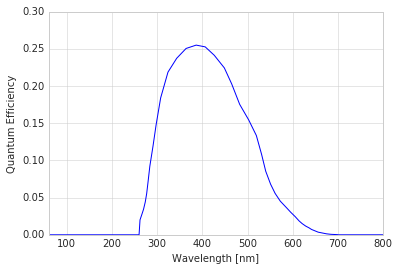

In [8]:
qe = pd.read_csv('data/qe_r7723.csv', index_col='wavelength')['efficiency'] / 100

plt.figure(); 
ax = qe.plot()
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Quantum Efficiency')

#### Print the data so that we can copy and paste to the .ratdb file

In [9]:
np.set_printoptions(formatter={'float': '{: 0.2f},'.format})
print(np.round(qe.index.values, 1))
print(np.round(qe.values, 2))

[ 60.00,  260.00,  262.10,  266.00,  269.90,  273.70,  276.80,  279.90,
  283.80,  290.80,  297.70,  307.70,  323.90,  343.20,  363.90,  386.20,
  406.20,  426.20,  448.50,  464.70,  482.30,  502.30,  519.20,  530.80,
  540.00,  550.70,  560.70,  572.20,  586.00,  595.20,  605.20,  613.60,
  620.50,  628.20,  635.90,  641.20,  655.80,  674.10,  684.00,  698.60,
  700.00,  800.00,]
[ 0.00,  0.00,  0.02,  0.03,  0.03,  0.04,  0.06,  0.07,  0.09,  0.12,
  0.15,  0.18,  0.22,  0.24,  0.25,  0.25,  0.25,  0.24,  0.22,  0.20,
  0.18,  0.15,  0.13,  0.11,  0.09,  0.07,  0.06,  0.05,  0.04,  0.03,
  0.02,  0.02,  0.02,  0.01,  0.01,  0.01,  0.00,  0.00,  0.00,  0.00,
  0.00,  0.00,]


#### For `RINDEX` and `KINDEX` (real and imaginary part of index of refraction), we copied them over from the default R5912 pmt

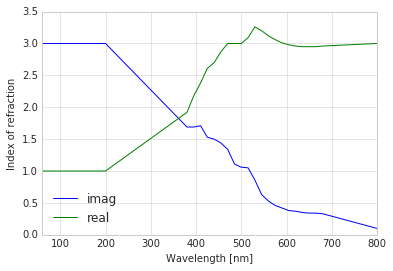

In [15]:
x = {
    'wavelength': [60.0, 200.0, 380.0, 395.0, 410.0, 425.0, 440.0, 455.0, 470.0, 485.0, 500.0, 515.0, 530.0, 545.0, 560.0, 575.0, 590.0, 605.0, 620.0, 635.0, 650.0, 665.0, 680.0, 800.0, ],
    'real': [1.0, 1.0, 1.92, 2.18, 2.38, 2.61, 2.70, 2.87, 3.00, 3.00, 3.00, 3.09, 3.26, 3.20, 3.12, 3.06, 3.01, 2.98, 2.96, 2.95, 2.95, 2.95, 2.96, 3.0, ],
    'imag': [3.0, 3.0, 1.69, 1.69, 1.71, 1.53, 1.50, 1.44, 1.34, 1.11, 1.06, 1.05, 0.86, 0.63, 0.53, 0.46, 0.42, 0.38, 0.37, 0.35, 0.34, 0.34, 0.33, 0.1, ],
}
rk = pd.DataFrame(data=x)
rk = rk.set_index('wavelength')

plt.figure(); 
ax = rk.plot()
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Index of refraction')


## PMT Charge and Transit Time Simulation

```javascript
//PMTCHARGE.ratdb
{
name: "PMTCHARGE",
index: "r7723",
valid_begin: [0,0],
valid_end: [0,0],

//units of pC here, implementers can choose their own units
charge: [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3., 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4., 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.],

//this will be integrated and normalized
//values based on a single gaussian fit to measured charge distribution of a single R11780-HQE PMT
charge_prob: [0.603378, 0.849476, 1.16968, 1.57519, 2.0747, 2.67257, 3.3671, 4.14893, 5., 5.89327, 6.79355, 7.65931, 8.4457, 9.10825, 9.60699, 9.91044, 9.99889, 9.86651, 9.52201, 8.98767, 8.29695, 7.49105, 6.61486, 5.71283, 4.82542, 3.98632, 3.22079, 2.54511, 1.96699, 1.4868, 1.09914, 0.794714, 0.561979, 0.388671, 0.262904, 0.173927, 0.112535, 0.0712136, 0.0440748, 0.0266791, 0.0157945, 0.00914521, 0.00517886, 0.00286832, 0.00155373, 0.000823142, 0.000426509, 0.00021614, 0.000107126, 0.0000519286, 0.0000246191],
}
```

---
```javascript
//PMTTRANSIT.ratdb
{
// Placeholder for r7723 data
name: "PMTTRANSIT",
index: "r7723",
valid_begin : [0, 0],
valid_end : [0, 0],
cable_delay: 0.0,

//need two points
time: [ -0.001, 0.000, 0.001 ],
//this will be integrated and normalized
time_prob: [ 0.0, 1.0, 0.0 ]
}
```

These are copied over from the default r11780_hqe charge distribution. 
Read [here](https://github.com/rat-pac/rat-pac/blob/a3d8c27542500299da8e02b405aad1c6f0d94fb0/doc/pmt.rst) for descriptions 
#### Let's plot them


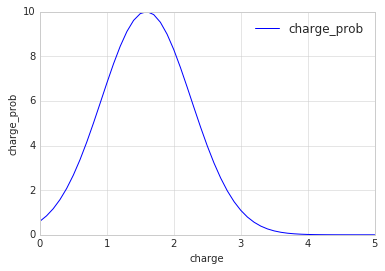

In [17]:
x = {
    'charge': [0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3., 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4., 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.],
    'charge_prob': [0.603378, 0.849476, 1.16968, 1.57519, 2.0747, 2.67257, 3.3671, 4.14893, 5., 5.89327, 6.79355, 7.65931, 8.4457, 9.10825, 9.60699, 9.91044, 9.99889, 9.86651, 9.52201, 8.98767, 8.29695, 7.49105, 6.61486, 5.71283, 4.82542, 3.98632, 3.22079, 2.54511, 1.96699, 1.4868, 1.09914, 0.794714, 0.561979, 0.388671, 0.262904, 0.173927, 0.112535, 0.0712136, 0.0440748, 0.0266791, 0.0157945, 0.00914521, 0.00517886, 0.00286832, 0.00155373, 0.000823142, 0.000426509, 0.00021614, 0.000107126, 0.0000519286, 0.0000246191],
}
charge = pd.DataFrame(data=x)
charge = charge.set_index('charge')

plt.figure(); 
ax = charge.plot()
ax.set_xlabel('charge')
ax.set_ylabel('charge_prob')

*why is it not peaked at 1 PE?* I suppose here charge is not calibrated (can be ADC*time, for example)

## That's all!